In [1]:
import pickle as pkl
import matplotlib.pyplot as plt
from matplotlib import style
import os 
os.chdir(os.path.dirname(os.getcwd()))
import pandas as pd
import pickle as pkl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
style.use('ggplot')
%matplotlib inline
import numpy as np

In [29]:
data = pkl.load(open('data/output/Multi_eval.pkl', "rb"))

In [30]:
data['Total Load'] = data['Total Load']*1000
data['Base Loads 1'] = data['Base Loads 1']*1000
data['Base Loads 2'] = data['Base Loads 2']*1000
data['Base Loads'] = data['Base Loads 1'] + data['Base Loads 2']

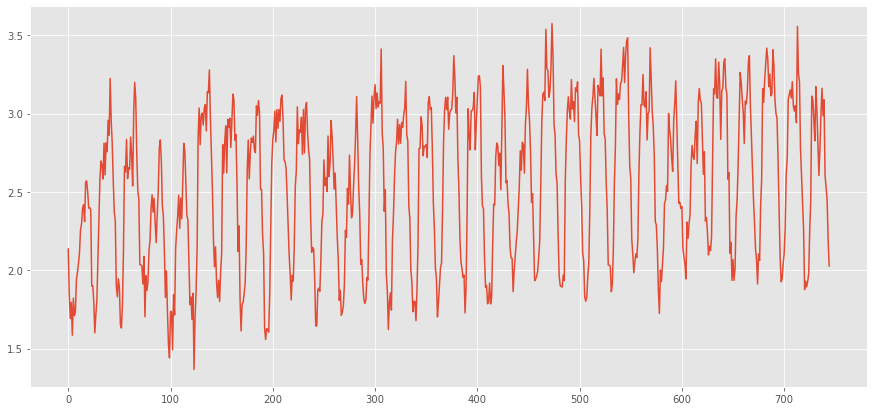

In [31]:
f, ax = plt.subplots(figsize=(15,7))
data['Base Loads'].plot()

In [29]:
data['Base Loads'].loc[data['Base Loads'] <= 2]

0      1.983668
2      1.957991
4      1.639438
5      1.727090
6      1.726854
         ...   
650    1.994666
651    1.868233
700    1.941165
722    1.968477
724    1.873325
Name: Base Loads, Length: 130, dtype: float64

In [17]:
data

,Inside Temperatures 1,Inside Temperatures 2,Base Loads 1,Base Loads 2,Ambient Temperatures,Actions,Rewards,Total Load,Base Loads
0,21.000000,21.000000,1.137992,0.947812,2.118,0.0,0.000000,1.798358,2.085804
1,19.275664,19.275664,0.809290,0.996745,2.118,0.0,-0.004496,1.798358,1.806035
2,20.360825,20.360825,0.964008,1.061038,2.147,0.0,-0.238851,5.806035,2.025046
3,18.713671,18.713671,1.011666,0.857450,2.324,0.0,-0.005063,2.025046,1.869116
4,19.879680,19.879680,0.820765,0.925654,2.344,1.0,-0.815674,5.869116,1.746420
...,...,...,...,...,...,...,...,...,...
740,19.589061,19.589061,1.442979,1.405194,-2.605,0.0,-0.308570,6.890188,2.848173
741,17.550390,17.550390,1.339504,1.394917,-2.735,0.0,-0.007120,2.848173,2.734421
742,18.057682,18.057682,1.252136,1.065729,-2.760,0.0,-1.967118,6.734421,2.317864
743,18.525542,18.525542,1.068397,1.200769,-2.714,0.0,-1.458113,6.317864,2.269166


In [32]:
data['Rewards'].sum()

-472.0643492795108

In [33]:
PRICE_SET = [20,30,40,50]
def extract_price(x):
    return PRICE_SET[int(x)]
data['Chosen Price'] = data['Actions'].map(lambda x: extract_price(x))

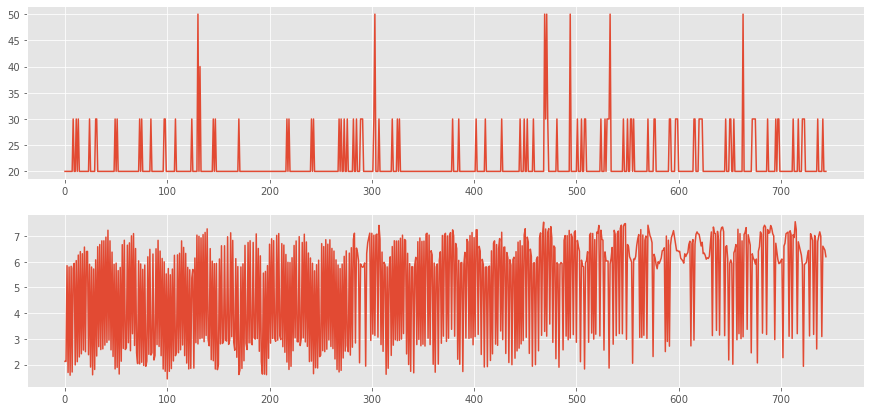

In [37]:
f, ax = plt.subplots(2,1,figsize=(15,7))
data['Chosen Price'].plot(ax=ax[0])
data['Total Load'].plot(ax=ax[1])

In [48]:
sum(data['Total Load'] >= 7)

116

In [43]:
data_base = pkl.load(open('data/output/Multibase_eval.pkl', "rb"))

In [44]:
data_base['Total Load'] = data_base['Total Load']*1000
data_base['Base Loads 1'] = data_base['Base Loads 1']*1000
data_base['Base Loads 2'] = data_base['Base Loads 2']*1000
data_base['Base Loads'] = data_base['Base Loads 1'] + data['Base Loads 2']

In [45]:
data_base['Rewards'].sum()

-448.5312087359056

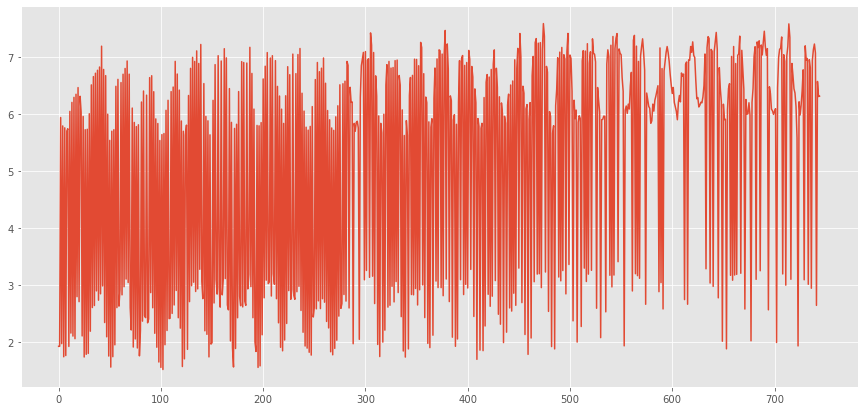

In [46]:
f, ax = plt.subplots(figsize=(15,7))
data_base['Total Load'].plot(ax=ax)

In [49]:
sum(data_base['Total Load'] >= 7)

116

In [26]:
data = pkl.load(open('data/output/8674132_dynamic_True_rewards_dqn.pkl', "rb"))

In [27]:
data[-1]

{'NUM_EPISODES': 3000,
 'EPSILON': 1,
 'EPS_DECAY': 0.999997,
 'LEARNING_RATE_': 0.00025,
 'GAMMA': 0.99,
 'TARGET_UPDATE': 10,
 'BATCH_SIZE': 32,
 'TIME_STEP_SIZE': 3600,
 'NUM_HOURS': 744,
 'COMFORT_PENALTY': 1}

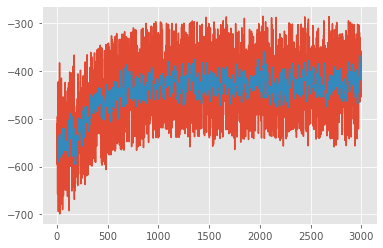

In [28]:
plt.figure()
plt.plot(data[:-1])
rewards_df = pd.DataFrame()
rewards_df['reward'] = data[:-1]
moving_avg = rewards_df[:-1].rolling(window=10).mean()
plt.plot(moving_avg)

In [18]:
data_rms = pkl.load(open('data/output/8667145_dynamic_True_rewards_dqn.pkl', "rb"))

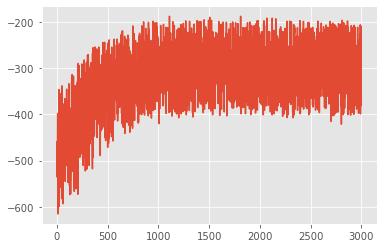

In [19]:
plt.figure()
plt.plot(data_rms[:-1])